## Proyecto 1: Regresión

## Reading .csv

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [116]:
df = pd.read_csv('winequality-red.csv')

In [117]:
theta = np.random.randn(12, 1)
y_BGD = np.empty([3428, 1])
i = 0
for v in y_train:
    y_BGD[i] = v
    i = i + 1

In [118]:
def pred_equation(x, T):
    sum = 0
    for i, item in enumerate(T):
        if(i==0):
            sum+=item
        else:
            sum += (item*x[i-1])
    return(sum)
def predictions(X_array, y_array, T):
    new_array = np.empty([y_array.size])
    for i, val in enumerate(X_array):
        new_array[i] = pred_equation(val, T)
    return(new_array)

## Mini-batch gradient descent w/ standardized data

In [119]:
X = np.array(df.iloc[:][['fixed acidity']])
y = np.array(df.iloc[:][['quality']])

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

In [121]:
X_train_scaled = preprocessing.scale(X_train)

In [122]:
X_b = np.c_[np.ones((27, 1)), X]

In [123]:
theta = np.random.randn(12, 1)
y_b = np.empty([27, 1])
i = 0
for v in y_train:
    y_b[i] = v
    i = i + 1
m = X_b.shape[0]
m

27

In [124]:
theta_path_mgd = []

n_iterations = 27
minibatch_size = 3

np.random.seed(42)
theta = np.random.randn(12,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0

In [125]:
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y_b[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

ValueError: shapes (3,2) and (12,1) not aligned: 2 (dim 1) != 12 (dim 0)

In [126]:
theta

array([[ 0.49671415],
       [-0.1382643 ],
       [ 0.64768854],
       [ 1.52302986],
       [-0.23415337],
       [-0.23413696],
       [ 1.57921282],
       [ 0.76743473],
       [-0.46947439],
       [ 0.54256004],
       [-0.46341769],
       [-0.46572975]])

In [127]:
X_test_scaled = preprocessing.scale(X_test)
prediction = predictions(X_test_scaled, y_test, theta)

IndexError: index 1 is out of bounds for axis 0 with size 1

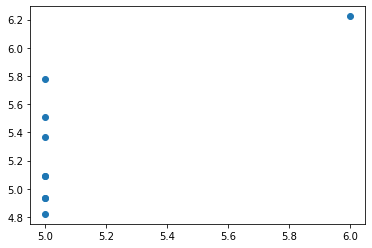

In [128]:
plt.scatter(y_test, prediction)

In [129]:
print('MAE', metrics.mean_absolute_error(y_test, prediction))
print('MSE', metrics.mean_squared_error(y_test, prediction))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE 0.263193650556865
MSE 0.12292352105739066
RMSE 0.3506045080391732


## Polynomial Regression w/ generated data set

In [74]:
m = 100
X = 6*np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

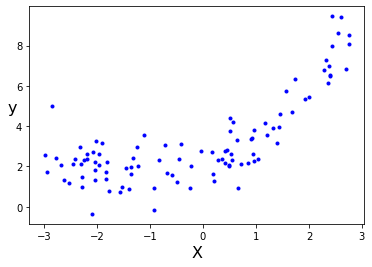

In [75]:
plt.plot(X, y, "b.")
plt.xlabel("X", fontsize = 16)
plt.ylabel("y", rotation=0, fontsize = 16)
plt.show()

In [83]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[2.70483394]
[2.70483394 7.31612666]


In [84]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.07427646]), array([[1.02081132, 0.45137789]]))

In [85]:
theta = lin_reg.coef_
theta = np.insert(theta, 0, lin_reg.intercept_)
theta

array([2.07427646, 1.02081132, 0.45137789])

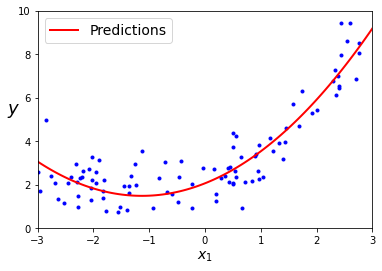

In [91]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## Polynomial Regression w/ wine data set